In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

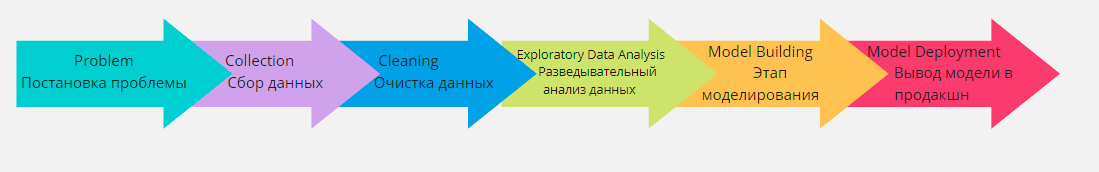

In [3]:
def point_vizual(point):#на вход принимает словaрь с команда:очки
    point_df = pd.DataFrame({
        'счет': list(point.values())
    })
    point_df.index = list(d.keys())
    point_df.sort_values(by="счет",axis=0,ascending=False)
    return(point_df)

def point_bund(df):
    n = list(df["Команда1"].value_counts().index)
    d = dict()
    for i in n:
        d.update({i:0})
    df = df.sort_values(by="Tour",axis=0)
    for i in list(df["id"]):
        num = list(df.loc[df["id"] == i,["Команда1", "счет1", "Команда2", "счет2"]].values[0])
        
        df.loc[df["id"] == i ,["Point_1"]] = d[num[0]]
        df.loc[df["id"] == i ,["Point_2"]]  = d[num[2]]
        
        if num[1] > num[3]:
            d[num[0]] +=  3
        elif num[1] < num[3]:
            d[num[2]] +=  3
        else:
            d[num[0]] +=  1
            d[num[2]] +=  1
    return df

def point_rang(df):# заполняет данные очками и рангом действующия
    d = pd.DataFrame({
        "team": list(df["Команда1"].value_counts().index),
        "point": [0] * len(list(df["Команда1"].value_counts().index)),
        "rang": [0] * len(list(df["Команда1"].value_counts().index)),
        "gool": [0] * len(list(df["Команда1"].value_counts().index)),
    })

    df = df.sort_values(by="Tour",axis=0)

    tour = df.loc[df["id"] == list(df["id"])[0] ,["Tour"]].values[0][0]

    for i in list(df["id"]):
        if tour == df.loc[df["id"] == i ,["Tour"]].values[0][0]:
            num = list(df.loc[df["id"] == i,["Команда1", "счет1", "Команда2", "счет2"]].values[0])
            #запись данных в датафрейм:
            df.loc[df["id"] == i ,["Point_1"]] = d.loc[d["team"] == num[0],["point"]].values[0][0]
            df.loc[df["id"] == i ,["Point_2"]] = d.loc[d["team"] == num[2],["point"]].values[0][0]

            df.loc[df["id"] == i ,["rang_1"]] = d.loc[d["team"] == num[0],["rang"]].values[0][0]
            df.loc[df["id"] == i ,["rang_2"]] = d.loc[d["team"] == num[2],["rang"]].values[0][0]
            
            # обновление данных в опереативной таблице:
            if num[1] > num[3]:
                d.loc[d["team"] == num[0],["point"]] +=  3
            elif num[1] < num[3]:
                d.loc[d["team"] == num[2],["point"]] +=  3
            else:
                d.loc[d["team"] == num[0],["point"]] +=  1
                d.loc[d["team"] == num[2],["point"]] +=  1
                
            d.loc[d["team"] == num[0],["gool"]] += num[1]
            d.loc[d["team"] == num[2],["gool"]] += num[3]
            
        else:
            #перезаписование тура
            tour = df.loc[df["id"] == i ,["Tour"]].values[0][0]
            #сортировка оперативной таблици, перезапись рангов
            d = d.sort_values(by=["point","gool"],ascending=[False,False])
            d.loc[:,"rang"] = range(1, len(list(df["Команда1"].value_counts().index))+1)
            
            num = list(df.loc[df["id"] == i,["Команда1", "счет1", "Команда2", "счет2"]].values[0])
            #запись данных в датафрейм:
            df.loc[df["id"] == i ,["Point_1"]] = d.loc[d["team"] == num[0],["point"]].values[0][0]
            df.loc[df["id"] == i ,["Point_2"]] = d.loc[d["team"] == num[2],["point"]].values[0][0]

            df.loc[df["id"] == i ,["rang_1"]] = d.loc[d["team"] == num[0],["rang"]].values[0][0]
            df.loc[df["id"] == i ,["rang_2"]] = d.loc[d["team"] == num[2],["rang"]].values[0][0]
            
            # обновление данных в опереативной таблице:
            if num[1] > num[3]:
                d.loc[d["team"] == num[0],["point"]] +=  3
            elif num[1] < num[3]:
                d.loc[d["team"] == num[2],["point"]] +=  3
            else:
                d.loc[d["team"] == num[0],["point"]] +=  1
                d.loc[d["team"] == num[2],["point"]] +=  1
                
            d.loc[d["team"] == num[0],["gool"]] += num[1]
            d.loc[d["team"] == num[2],["gool"]] += num[3]
    d = d.sort_values(by=["point","gool"],ascending=[False,False])
    d.loc[:,"rang"] = range(1, len(list(df["Команда1"].value_counts().index))+1)    
    return df, d

def preobr(df):
    if 'Unnamed: 0.1' in list(df.columns):
        df = df.drop('Unnamed: 0.1',axis=1)
    if 'Unnamed: 0' in list(df.columns):
        df = df.drop('Unnamed: 0',axis=1)
    
    df = df.drop('Матчи 1',axis=1)
    df = df.drop('Матчи 2',axis=1)
    df = df.astype({'счет1': 'int32'})
    df = df.astype({'счет2': 'int32'})

    df["тотал"] = df["счет1"] + df["счет2"]
    df["Дата"] = pd.to_datetime(df['Дата'],dayfirst=True)
    df['Температура'] = df['Температура'].apply(lambda x: int(x[1:-2]))
    
    for i in [14919463, 14898101]:
        df.loc[df["id"] == i ,['Офсайды  (соперник) 2']] = 4.00
        df.loc[df["id"] == i ,['Офсайды 2']] = 1.00
    
    #mask_1 = df["id"] == 14898101
    #df['Офсайды  (соперник) 2'][mask_1] = 4.00
    #df['Офсайды 2'][mask_1] = 1.00
    
    df["rang_1"] = 0
    df["rang_2"] = 0  
    df["Point_1"] = 0
    df["Point_2"] = 0
    df["liga"] = df["общая информация"].apply(lambda x: x.split(",")[0])
    df["Tour"] = df["общая информация"].apply(lambda x: x.split(",")[1])
    
    df = df[df["Tour"] != " стыковые матчи"]
    df = df[df["Tour"] != " понижение/повышение - финал"]
    df = df[df["Tour"] != " дополнительный матч"]
    df["Tour"] = df["Tour"].apply(lambda x: int(x.strip()[:-6]))
    
    df = df.astype({'Офсайды  (соперник) 2': 'float32'})
    df = df.astype({'Офсайды 2': 'float32'})

    df["Сухие матчи 1"] = df["Сухие матчи 1"].apply(lambda x: int(x.split()[-1]))
    df["Сухие матчи 2"] = df["Сухие матчи 2"].apply(lambda x: int(x.split()[0]))

    df["обе забьют 1"] = df["обе забьют 1"].apply(lambda x: int(x.split()[-1]))
    df["обе забьют 2"] = df["обе забьют 2"].apply(lambda x: int(x.split()[0]))

    df["Тотал больше 2.5 1"] = df["Тотал больше 2.5 1"].apply(lambda x: int(x.split()[-1]))
    df["Тотал больше 2.5 2"] = df["Тотал больше 2.5 2"].apply(lambda x: int(x.split()[0]))

    df["Тотал меньше 2.5 1"] = df["Тотал меньше 2.5 1"].apply(lambda x: int(x.split()[-1]))
    df["Тотал меньше 2.5 2"] = df["Тотал меньше 2.5 2"].apply(lambda x: int(x.split()[0]))

    df["Поражения 1"] = df["Поражения 1"].apply(lambda x: int(x.split()[-1]))
    df["Поражения 2"] = df["Поражения 2"].apply(lambda x: int(x.split()[0]))

    df["Ничьи 1"] = df["Ничьи 1"].apply(lambda x: int(x.split()[-1]))
    df["Ничьи 2"] = df["Ничьи 2"].apply(lambda x: int(x.split()[0]))

    df["Победы 1"] = df["Победы 1"].apply(lambda x: int(x.split()[-1]))
    df["Победы 2"] = df["Победы 2"].apply(lambda x: int(x.split()[0]))

    df["Отдых: дни (часы) 1"] = df["Отдых: дни (часы) 1"].apply(lambda x: float(x.split()[-1]))
    df["Отдых: дни (часы) 2"] = df["Отдых: дни (часы) 2"].apply(lambda x: float(x.split()[0]))
    
    df, d = point_rang(df)
    return df

In [4]:
Bundes_liga_19_20 = pd.read_csv("../data_auto/Bundes_lige2019-2020.csv")
Bundes_liga_20_21 = pd.read_csv("../data_auto/Bundes_lige2020-2021.csv")
Bundes_liga_21_22 = pd.read_csv("../data_auto/Bundes_lige2021-2022.csv")
Bundes_liga_22_23 = pd.read_csv("../data_auto/Bundes_lige2022-2023.csv")

Premier_liga19_20 = pd.read_csv("../data_auto/Premier_liga2019-2020.csv")
Premier_liga20_21 = pd.read_csv("../data_auto/Premier_liga2020-2021.csv")
Premier_liga21_22 = pd.read_csv("../data_auto/Premier_liga2021-2022.csv")
Premier_liga22_23 = pd.read_csv("../data_auto/Premier_liga2022-2023.csv")

Seria_A_liga19_20 = pd.read_csv("../data_auto/Seria_A_liga2019-2020.csv")
Seria_A_liga20_21 = pd.read_csv("../data_auto/Seria_A_liga2020-2021.csv")
Seria_A_liga21_22 = pd.read_csv("../data_auto/Seria_A_liga2021-2022.csv")
Seria_A_liga22_23 = pd.read_csv("../data_auto/Seria_A_liga2022-2023.csv")

Primera_liga19_20 = pd.read_csv("../data_auto/Primera_liga2019-2020.csv")
Primera_liga20_21 = pd.read_csv("../data_auto/Primera_liga2020-2021.csv")
Primera_liga21_22 = pd.read_csv("../data_auto/Primera_liga2021-2022.csv")
Primera_liga22_23 = pd.read_csv("../data_auto/Primera_liga2022-2023.csv")

In [5]:
Bundes_liga_19_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0.1                    308 non-null    int64  
 1   Unnamed: 0                      308 non-null    int64  
 2   id                              308 non-null    int64  
 3   общая информация                308 non-null    object 
 4   Дата                            308 non-null    object 
 5   Команда1                        308 non-null    object 
 6   счет1                           308 non-null    int64  
 7   Команда2                        308 non-null    object 
 8   счет2                           308 non-null    int64  
 9   Температура                     308 non-null    object 
 10  Признак погоды                  308 non-null    object 
 11  поб1                            308 non-null    float64
 12  X                               308 

In [6]:
Bundes_liga_19_20_cl = preobr(Bundes_liga_19_20)
Bundes_liga_20_21_cl = preobr(Bundes_liga_20_21)
Bundes_liga_21_22_cl = preobr(Bundes_liga_21_22)
Bundes_liga_22_23_cl = preobr(Bundes_liga_22_23)

Premier_liga19_20_cl = preobr(Premier_liga19_20)
Premier_liga20_21_cl = preobr(Premier_liga20_21)
Premier_liga21_22_cl = preobr(Premier_liga21_22)
Premier_liga22_23_cl = preobr(Premier_liga22_23)

Seria_A_liga19_20_cl = preobr(Seria_A_liga19_20)
Seria_A_liga20_21_cl = preobr(Seria_A_liga20_21)
Seria_A_liga21_22_cl = preobr(Seria_A_liga21_22)
Seria_A_liga22_23_cl = preobr(Seria_A_liga22_23)

Primera_liga19_20_cl = preobr(Primera_liga19_20)
Primera_liga20_21_cl = preobr(Primera_liga20_21)
Primera_liga21_22_cl = preobr(Primera_liga21_22)
Primera_liga22_23_cl = preobr(Primera_liga22_23)

In [7]:
df = pd.concat([Bundes_liga_19_20_cl,
               Bundes_liga_20_21_cl,
               Bundes_liga_21_22_cl,
               Bundes_liga_22_23_cl,
               Premier_liga19_20_cl,
               Premier_liga20_21_cl,
               Premier_liga21_22_cl,
               Premier_liga22_23_cl,
               Seria_A_liga19_20_cl,
               Seria_A_liga20_21_cl,
               Seria_A_liga21_22_cl,
               Seria_A_liga22_23_cl,
               Primera_liga19_20_cl,
               Primera_liga20_21_cl,
               Primera_liga21_22_cl,
               Primera_liga22_23_cl])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5784 entries, 307 to 0
Data columns (total 77 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              5784 non-null   int64         
 1   общая информация                5784 non-null   object        
 2   Дата                            5784 non-null   datetime64[ns]
 3   Команда1                        5784 non-null   object        
 4   счет1                           5784 non-null   int32         
 5   Команда2                        5784 non-null   object        
 6   счет2                           5784 non-null   int32         
 7   Температура                     5784 non-null   int64         
 8   Признак погоды                  5784 non-null   object        
 9   поб1                            5784 non-null   float64       
 10  X                               5784 non-null   float64       
 11  поб2 

|№|Столбец 2|Столбец 3|
|-|--------|---|
 0 |**id**                             |id матча     
 1 |**общая информация**               | заголовок      
 2 |**Дата**                           | дата
 3 |**Команда1**                       | название команды хозяева  
 4 |**счет1**                          | счет по истечению матча хозяев
 5 |**Команда2**                       | название команды гости
 6 |**счет2**                          | счет по истечению матча гости   
 7 |**Температура**                    | темперетура    
 8 |**Признак погоды**                 | признак погоды
 9 |**поб1**                           |  коэфиценты для ставок     
 10|**X**                              |  коэфиценты для ставок     
 11|**поб2**                           |  коэфиценты для ставок     
 12|**ТМ 2.5**                         |  коэфиценты для ставок     
 13|**ТБ 2.5**                         |  коэфиценты для ставок     
 14|**Матчи 1**                        | кол-во матчей для статистики(удолить)
 15|**Матчи 2**                        | кол-во матчей для статистики(удолить)     
 16|**Отдых: дни (часы) 1**            |       
 17|**Отдых: дни (часы) 2**            |       
 18|**Победы 1**                       |       
 19|**Победы 2**                       |       
 20|**Ничьи 1**                        |       
 21|**Ничьи 2**                        |       
 22|**Поражения 1**                    |       
 23|**Поражения 2**                    |       
 24|**Забито голов 1**                 |       
 25|**Забито голов 2**                 |       
 26|**Пропущено голов 1**              |       
 27|**Пропущено голов 2**              |       
 28|**Забито голов за игру 1**         |       
 29|**Забито голов за игру 2**         |       
 30|**Пропущено голов за игру 1**      |       
 31|**Пропущено голов за игру 2**      |       
 32|**Сухие матчи 1**                  |       
 33|**Сухие матчи 2**                  |       
 34|**обе забьют 1**                   |       
 35|**обе забьют 2**                   |       
 36|**Тотал больше 2.5 1**             |       
 37|**Тотал больше 2.5 2**             |       
 38|**Тотал меньше 2.5 1**             |       
 39|**Тотал меньше 2.5 2**             |       
 40|**Удары 1**                        |       
 41|**Удары 2**                        |       
 42|**Удары  (соперник) 1**            |       
 43|**Удары  (соперник) 2**            |       
 44|**Удары в створ 1**                |       
 45|**Удары в створ 2**                |       
 46|**Удары в створ  (соперник) 1**    |       
 47|**Удары в створ  (соперник) 2**    |       
 48|**Владение 1**                     |       
 49|**Владение 2**                     |       
 50|**Владение  (соперник) 1**         |       
 51|**Владение  (соперник) 2**         |       
 52|**Угловые 1**                      |       
 53|**Угловые 2**                      |       
 54|**Угловые  (соперник) 1**          |       
 55|**Угловые  (соперник) 2**          |       
 56|**Нарушения 1**                    |       
 57|**Нарушения 2**                    |       
 58|**Нарушения  (соперник) 1**        |       
 59|**Нарушения  (соперник) 2**        |       
 60|**Офсайды 1**                      |       
 61|**Офсайды 2**                      |       
 62|**Офсайды  (соперник) 1**          |       
 63|**Офсайды  (соперник) 2**          |       
 64|**Желтые карточки 1**              |       
 65|**Желтые карточки 2**              |                      
 66|**Желтые карточки  (соперник) 1**  |       
 67|**Желтые карточки  (соперник) 2**  |       
 68|**Красные карточки 1**             |              
 69|**Красные карточки 2**             |       
 70|**Красные карточки  (соперник) 1** |       
 71|**Красные карточки  (соперник) 2** |       
 72|**тотал**                          | целевой признак     

## Exploratory Data Analysis


In [9]:
df_bund = df[df["liga"]== "Бундеслига"]

In [10]:
df_bund.info()
fig_corr = px.imshow(
    df_bund.corr(),
    text_auto=True,
    height=1400,
    width=1400)
fig_corr.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 307 to 2
Data columns (total 77 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1224 non-null   int64         
 1   общая информация                1224 non-null   object        
 2   Дата                            1224 non-null   datetime64[ns]
 3   Команда1                        1224 non-null   object        
 4   счет1                           1224 non-null   int32         
 5   Команда2                        1224 non-null   object        
 6   счет2                           1224 non-null   int32         
 7   Температура                     1224 non-null   int64         
 8   Признак погоды                  1224 non-null   object        
 9   поб1                            1224 non-null   float64       
 10  X                               1224 non-null   float64       
 11  поб2 

In [11]:
df_bund.describe()

,id,счет1,счет2,Температура,поб1,X,поб2,ТМ 2.5,ТБ 2.5,Отдых: дни (часы) 1,...,Красные карточки 1,Красные карточки 2,Красные карточки (соперник) 1,Красные карточки (соперник) 2,тотал,rang_1,rang_2,Point_1,Point_2,Tour
count,1.224000e+03,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,...,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,1.177233e+07,1.738562,1.394608,16.104575,2.984208,4.517410,4.550074,2.439690,1.675490,7.046895,...,0.059918,0.059436,0.056446,0.057606,3.133170,9.310458,9.130719,22.647876,22.750000,17.500000
std,5.798260e+06,1.420081,1.262842,4.406438,2.420656,1.658294,4.210278,0.599178,0.275224,6.194856,...,0.082321,0.083110,0.081599,0.084505,1.715995,5.347914,5.369662,16.292734,16.034547,9.814719
min,1.736825e+06,0.000000,0.000000,9.000000,1.060000,3.020000,1.110000,1.530000,1.090000,2.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.160785e+07,1.000000,0.000000,12.000000,1.717500,3.620000,2.270000,2.067500,1.470000,3.900000,...,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,4.000000,9.000000,10.000000,9.000000
50%,1.501301e+07,1.000000,1.000000,15.000000,2.260000,3.920000,3.240000,2.300000,1.660000,6.800000,...,0.000000,0.000000,0.000000,0.000000,3.000000,9.000000,9.000000,20.000000,21.000000,17.500000
75%,1.517748e+07,2.000000,2.000000,19.000000,3.200000,4.650000,5.050000,2.600000,1.850000,7.800000,...,0.100000,0.100000,0.100000,0.100000,4.000000,14.000000,14.000000,33.000000,33.000000,26.000000
max,1.532647e+07,8.000000,7.000000,26.000000,22.000000,17.250000,38.000000,5.950000,2.800000,72.200000,...,0.500000,0.500000,0.500000,0.500000,9.000000,18.000000,18.000000,76.000000,79.000000,34.000000


## Зависимость исхода матча от температуры